# Quantium Data Analytics Virtual Experience - Task1 - Josh Bryden

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats

#Pandas settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# seaborn settings
sns.set_style("darkgrid")

## Data importing

In [2]:
purchase_data = pd.read_csv('../data/QVI_purchase_behaviour.csv')
purchase_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
purchase_data.shape

(72637, 3)

In [4]:
purchase_data.dtypes 

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [5]:
purchase_data.nunique() 

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

In [6]:
purchase_data.isnull().sum() # missing values - none

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [7]:
transaction_data = pd.read_csv('../data/QVI_transaction_data.csv')
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [8]:
transaction_data.shape 

(264836, 8)

In [9]:
transaction_data.dtypes 

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

Date encoded above as int - we will need to change to datetime

In [10]:
transaction_data.nunique()

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

In [11]:
transaction_data.isnull().sum() # missing values - none

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

## Data cleaning

In [12]:
# merge the two datasets on the loyalty card number
chips_data = pd.merge(transaction_data, purchase_data, on='LYLTY_CARD_NBR', how='left')
chips_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [13]:
# convert excel date time to python date time
chips_data['DATE'] = pd.to_datetime(chips_data['DATE'], origin = "1899-12-30", unit='D') # origin set based off excel time, units in days since epoch (for excel this is 1/1/1900)
# https://stackoverflow.com/a/64068366/11938664
chips_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [14]:
chips_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


The describe table above shows that there was 200 items bought in a transaction and that the total sales for a product was 650. We will need to investigate

In [15]:
# where sales were over 5 - this is higher than the 75th percentile
chips_data[chips_data['PROD_QTY']>5]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium


In [16]:
# Drop the outliers - these sales may be real or not - however they are outliers
chips_data.drop(chips_data[chips_data['PROD_QTY']==200].index, inplace=True)

In [17]:
# sanity check - should be 0 rows 
chips_data[chips_data['PROD_QTY']>5]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER


Examine the products in the dataset

In [18]:
print(chips_data['PROD_NAME'].unique())

['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Red Rock 

Count the number of times each word appears in the dataset

In [19]:
# split up string by spaces
product_words = chips_data["PROD_NAME"].str.split() # default is split on whitespace

In [20]:
def product_unique_words(list_of_words):
    """ Counts number of times a word
        appears in a list of words """
    for word in list_of_words:
        if word not in word_count:
            word_count[word] = 1
        else:
            word_count[word] +=1

In [21]:
# initalize word_count
word_count = {}
# apply product_unique_words function to each row of the product_words list
product_words.apply(lambda row: product_unique_words(row))
# change product words to series and sort values with largest at top
print(pd.Series(word_count).sort_values(ascending=False))

175g                  60561
Chips                 49770
150g                  41633
Kettle                41288
&                     35565
Smiths                28860
Salt                  27976
Cheese                27890
134g                  25102
Pringles              25102
Doritos               24962
Crinkle               23960
110g                  22387
Corn                  22061
Original              21560
Cut                   20754
Chip                  18645
170g                  18502
Salsa                 18094
Chicken               15407
165g                  15297
Sea                   14145
Thins                 14075
Sour                  13882
Crisps                12607
330g                  12540
Vinegar               12402
Chilli                12389
300g                  12041
RRD                   11894
Infuzions             11057
Supreme               10961
WW                    10320
Popd                   9693
Cobs                   9693
Tortilla            

From the output above we can see that the datset contains products with 'Salsa' in it - we should remove these values

In [22]:
# drop salsa products
chips_data = chips_data[~chips_data['PROD_NAME'].str.contains('Salsa')]

## Pack size/ weight

In [23]:
# extract weight/ size from product name

# function to determine if weight in product name
def product_weight(product_name):
    """ Function extracts weight
        from product name """
    weight='' # string
    for character in product_name: # loop over each character in product name
        if character.isdigit(): # if character is a digit
            weight+=character # add digit to the  string 'weight'
    return int(weight) # return the int of the string 'weight' for each product


In [24]:
# Apply product_weight to 'PROD_NAME' column to create 'PACK_WEIGHT' column
chips_data['PACK_WEIGHT']=chips_data['PROD_NAME'].apply(product_weight)
chips_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_WEIGHT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,150


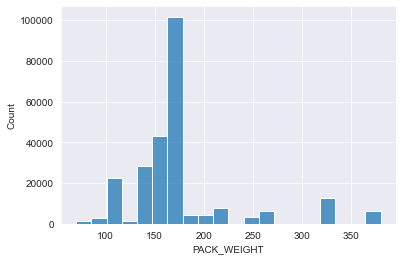

In [25]:
# Histogram of pack size
sns.histplot(x='PACK_WEIGHT', bins=20, data=chips_data)
plt.show()
# most packs around the 170g and 175g size

## Brand names

In [26]:
# Create function to extract first word from product name - tends to be brand name
def brand_name(product):
    """ Function extracts first word
    from product name which is the Brand"""
    return product.split(' ')[0] # returns first word split by whitespace

In [27]:
# Apply brand_name to chips_data
chips_data['BRAND_NAME'] = chips_data['PROD_NAME'].apply(brand_name)
chips_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_WEIGHT,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,150,Kettle


In [28]:
# Brands in BRAND_NAME column
chips_data['BRAND_NAME'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [29]:
# replace abbrevations with actual brand names - used personal knowledge of Woolworths products here
# Woolworths products are somtimes abbreviated in system if product name is long. This is so it can fit onto a ticket instore (shelf label)
chips_data['BRAND_NAME'].replace('Natural', 'Natural Chip Co', inplace = True)
chips_data['BRAND_NAME'].replace('NCC', 'Natural Chip Co', inplace = True) 
chips_data['BRAND_NAME'].replace('Grain', 'Grain Waves', inplace = True)
chips_data['BRAND_NAME'].replace('WW', 'Woolworths', inplace = True)
chips_data['BRAND_NAME'].replace('Burger', 'Burger Rings', inplace = True)
chips_data['BRAND_NAME'].replace('Infzns', 'Infuzions', inplace = True)
chips_data['BRAND_NAME'].replace('Red', 'Red Rock Deli', inplace = True)
chips_data['BRAND_NAME'].replace('Dorito', 'Doritos', inplace = True)
chips_data['BRAND_NAME'].replace('Smith', 'Smiths', inplace = True)
chips_data['BRAND_NAME'].replace('GrainWves', 'Grain Waves', inplace = True)
chips_data['BRAND_NAME'].replace('French', 'French Fries', inplace = True)
chips_data['BRAND_NAME'].replace('Infzns', 'Infuzions', inplace = True)
chips_data['BRAND_NAME'].replace('RRD', 'Red Rock Deli', inplace = True)
chips_data['BRAND_NAME'].replace('Snbts', 'Sunbites', inplace = True)

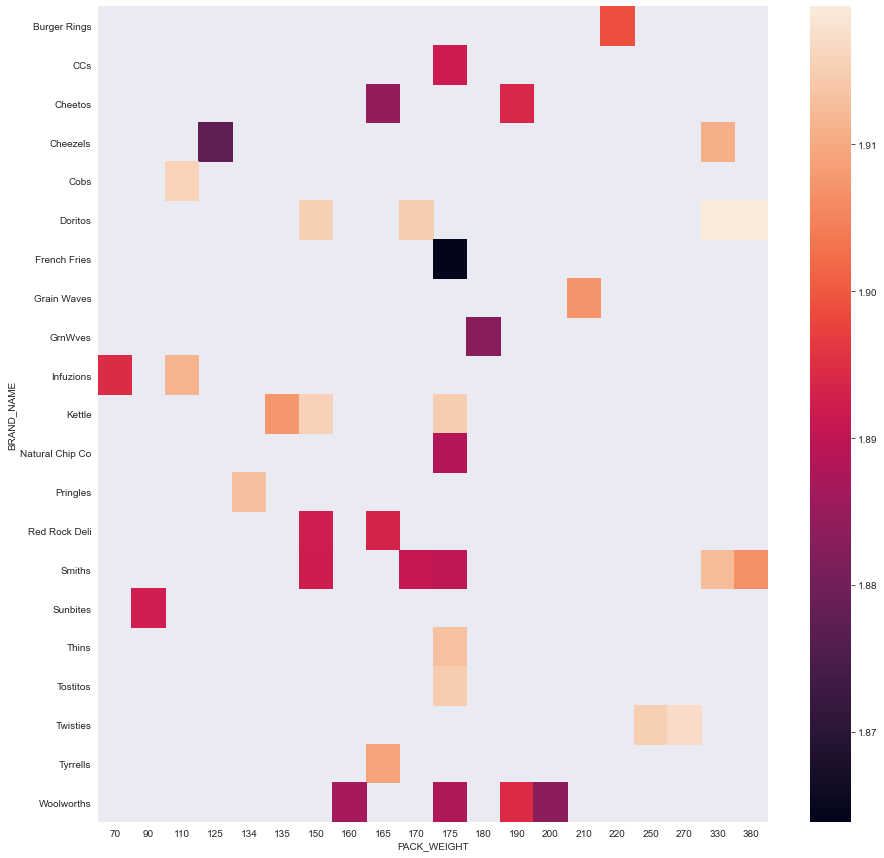

In [30]:
# Heatmap of PROD_QTY by BRAND_NAME and PACK_WEIGHT - examine sales by item
plt.figure(figsize=(15,15))
sns.heatmap(pd.pivot_table(data=chips_data, index='BRAND_NAME', columns='PACK_WEIGHT', values='PROD_QTY'))
plt.show()

The heatmap above shows that (as seen in our pack_weight histogram) that a majority of chips have sizes of 170 and 175g. Furthermore we have a higher sales volume in Cobs popcorn (110g), Doritos (150g, 170g), Kettle chips (150g, 175g), Pringles (134g), Thins (175g) and Twisties (250g, 255g)  

## Customers and their purchases

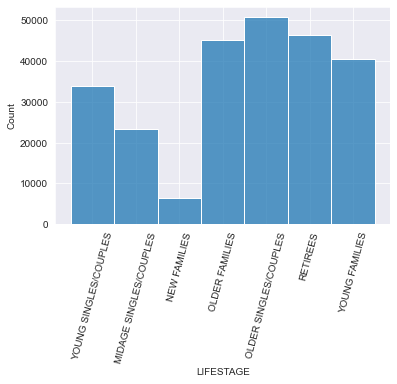

In [31]:
# histogram of customers at their various 'lifestage'
sns.histplot(x='LIFESTAGE', data=chips_data)
plt.xticks(rotation=75)
plt.show()

We see that we have high numbers of older families, older singles/ couples, retiriees and young families. With lower numbers of young singles/ couples and midage singles/couples.

 Interestingly new families bought chips the least in our dataset (we should investigate) - potentially due to small children and having different shopping items that are required (ie - baby formula, baby food, healthy school lunch snacks, etc)

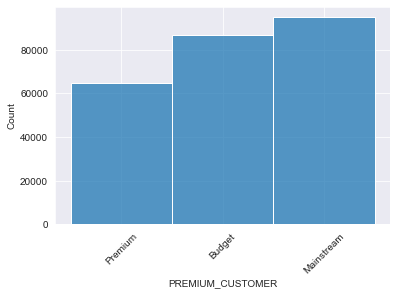

In [32]:
# hisogram of how premium a customer is
sns.histplot(x='PREMIUM_CUSTOMER', data=chips_data)
plt.xticks(rotation=45)
plt.show()

We see that a majority of customers are mainstream, slightly less are budget and even less are premium customers buying the most expensive products. 

Woolworths stores are rated internally as: budget, mainstream, premium and super-premium. This is determined by the demographic of customer types based off loyalty card info.

Lets check that our dataset is not from just a couple stores...

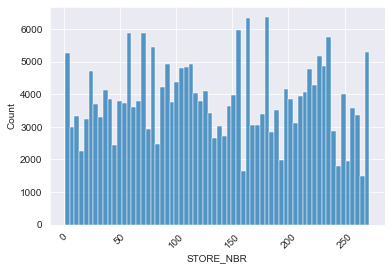

In [33]:
# store numbers
sns.histplot(x='STORE_NBR', data=chips_data)
plt.xticks(rotation=45)
plt.show()

The above confirms that our dataset is not from a small handful of stores, hence we can assume that our dataset is an accurate representation of shoppers overall at Woolworths.

In [34]:
# Examine sales by how premium the customer is and by their lifestage
customer_sales = chips_data[['TOT_SALES', 'PREMIUM_CUSTOMER', 'LIFESTAGE']].groupby(['PREMIUM_CUSTOMER' ,'LIFESTAGE']).sum().sort_values('TOT_SALES',ascending=False)
customer_sales

TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                        
Budget           OLDER FAMILIES          156863.75
Mainstream       YOUNG SINGLES/COUPLES   147582.20
                 RETIREES                145168.95
Budget           YOUNG FAMILIES          129717.95
                 OLDER SINGLES/COUPLES   127833.60
Mainstream       OLDER SINGLES/COUPLES   124648.50
Premium          OLDER SINGLES/COUPLES   123537.55
Budget           RETIREES                105916.30
Mainstream       OLDER FAMILIES           96413.55
Premium          RETIREES                 91296.65
Mainstream       YOUNG FAMILIES           86338.25
                 MIDAGE SINGLES/COUPLES   84734.25
Premium          YOUNG FAMILIES           78571.70
                 OLDER FAMILIES           75242.60
Budget           YOUNG SINGLES/COUPLES    57122.10
Premium          MIDAGE SINGLES/COUPLES   54443.85
                 YOUNG SINGLES/COUPLES    39052.30
Budget           MIDAGE SINGLES/COUPLES   33345.70
                 NEW FAMILIES             20607.45
Mainstream       NEW FAMILIES             15979.70
Premium          NEW FAMILIES             10760.80

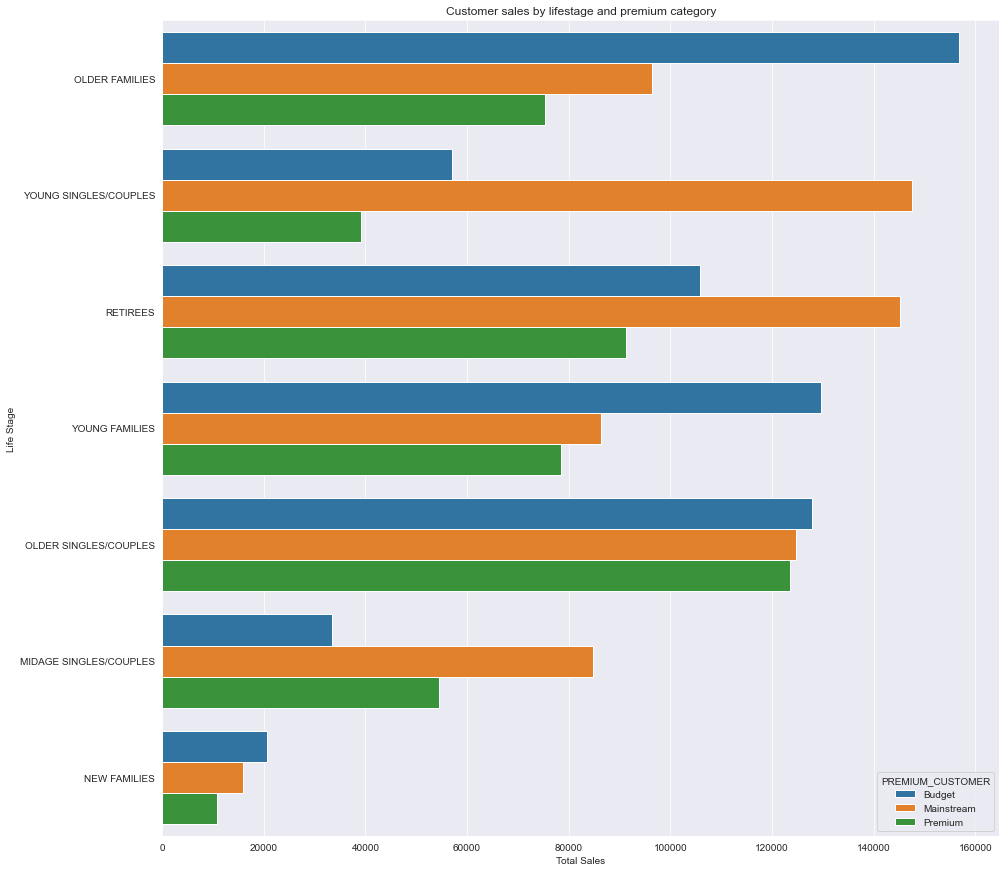

In [35]:
plt.figure(figsize=(15,15))
sns.barplot(y=customer_sales.reset_index()['LIFESTAGE'], x=customer_sales.reset_index()['TOT_SALES'], hue=customer_sales.reset_index()['PREMIUM_CUSTOMER'], data=customer_sales)
plt.title('Customer sales by lifestage and premium category')
plt.xlabel('Total Sales')
plt.ylabel('Life Stage')
plt.show()

In [36]:
# Determine number of customer in each segment based off the loyalty card number
customer_numbers = chips_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).count()

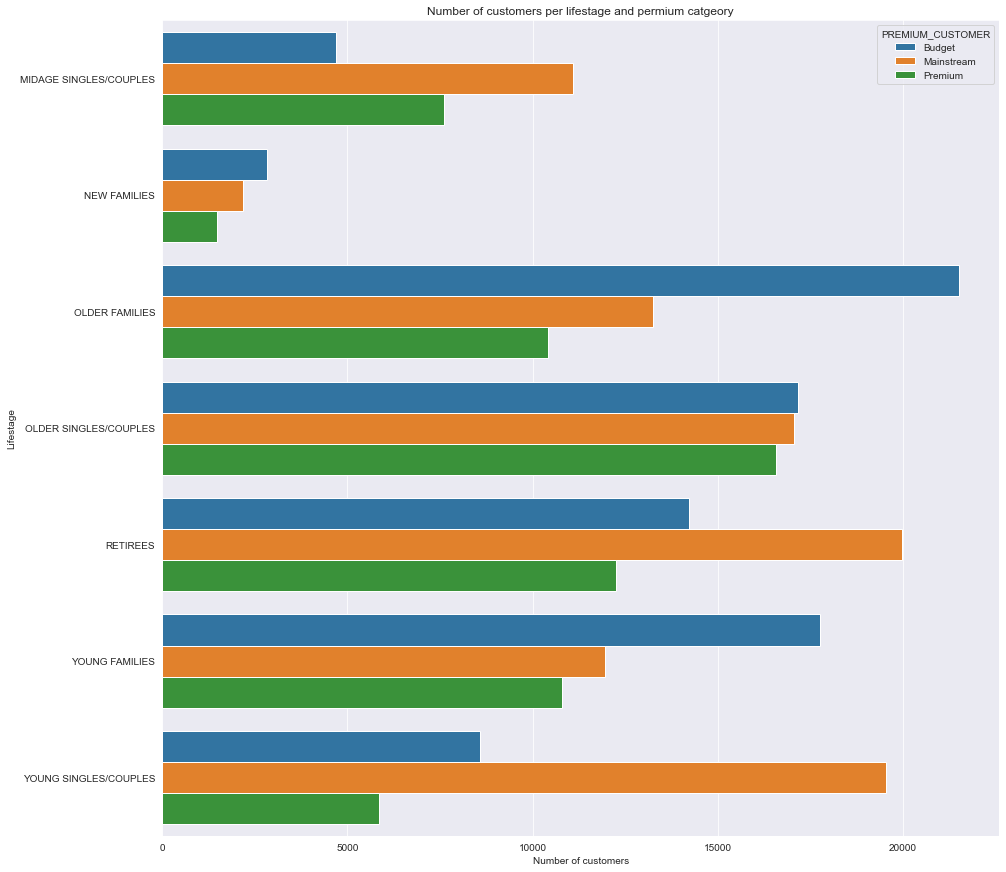

In [37]:
# Plot customer_numbers
plt.figure(figsize=(15,15))
sns.barplot(y=customer_numbers.reset_index()['LIFESTAGE'], x=customer_numbers.reset_index()['LYLTY_CARD_NBR'], hue=customer_numbers.reset_index()['PREMIUM_CUSTOMER'], data=customer_numbers)
plt.title('Number of customers per lifestage and permium catgeory')
plt.xlabel('Number of customers')
plt.ylabel('Lifestage')
plt.show()

In [38]:
# Compute average price of chips sales per customer
chips_data['AVG_CHIP_PRICE'] = chips_data['TOT_SALES']/chips_data['PROD_QTY']
chips_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,PACK_WEIGHT,BRAND_NAME,AVG_CHIP_PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,Natural Chip Co,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175,CCs,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170,Smiths,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget,175,Smiths,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget,150,Kettle,4.60


In [39]:
# Group average sales by lifestage and market segment
average_sales = chips_data[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'AVG_CHIP_PRICE']].groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).mean()
average_sales.sort_values('AVG_CHIP_PRICE',ascending=False)

AVG_CHIP_PRICE
LIFESTAGE              PREMIUM_CUSTOMER                
YOUNG SINGLES/COUPLES  Mainstream              4.065642
MIDAGE SINGLES/COUPLES Mainstream              3.994241
RETIREES               Budget                  3.924404
                       Premium                 3.920942
NEW FAMILIES           Budget                  3.917688
                       Mainstream              3.916133
OLDER SINGLES/COUPLES  Premium                 3.893182
                       Budget                  3.882096
NEW FAMILIES           Premium                 3.872110
RETIREES               Mainstream              3.844294
OLDER SINGLES/COUPLES  Mainstream              3.814665
MIDAGE SINGLES/COUPLES Premium                 3.770698
YOUNG FAMILIES         Premium                 3.762150
                       Budget                  3.760737
OLDER FAMILIES         Budget                  3.745340
MIDAGE SINGLES/COUPLES Budget                  3.743328
OLDER FAMILIES         Mainstream              3.737077
YOUNG FAMILIES         Mainstream              3.724533
OLDER FAMILIES         Premium                 3.717000
YOUNG SINGLES/COUPLES  Premium                 3.665414
                       Budget                  3.657366

The output above shows that both mainstream young and midage singles/couples are the higest spenders on chips. This may be due to the lack of children, hence more $ to spend as they see fit. This also may be due to the graph above showing much higher numbers of young and midage couples in the mainstream category compared to their respective premium and budget counterparts.


To determine if the difference in average price is significant between the different premium levels of customer in these categories we will perform a T-test.


In [40]:
# t - test
# First comparing mainstream against budget young and midage couples/ singles
# values taken from table above
stats.ttest_ind([4.065642,3.994241],[3.657366,3.743328])

Ttest_indResult(statistic=5.898899732826305, pvalue=0.027555775534860754)

In [41]:
# Comparing mainstream against premium young and midage couples/ singles
# values taken from table above
stats.ttest_ind([4.065642,3.994241],[3.665414,3.770698])

Ttest_indResult(statistic=4.903408005498769, pvalue=0.039164352682153285)

Based off the output above, we obtained a p value of 0.027 for the difference between mainstream and budget customers (young and midage couples/singles) - thus indicating a significant difference between these two groups.

We also found a significant p value of 0.039 for the difference between mainstream and premium customers.